In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics



In [32]:
dataset=pd.read_csv('/content/car data.csv')

In [33]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [34]:
dataset.shape

(301, 9)

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [36]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [37]:
#Distribution of categorical data
print(dataset.Fuel_Type.value_counts())
print(dataset.Seller_Type.value_counts())
print(dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [38]:

dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [39]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [40]:
X = np.array(dataset.drop(['Car_Name','Selling_Price'],axis=1))
y = np.array(dataset['Selling_Price'])

In [41]:
print(X)
print(y)

[[2.0140e+03 5.5900e+00 2.7000e+04 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0130e+03 9.5400e+00 4.3000e+04 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0170e+03 9.8500e+00 6.9000e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 ...
 [2.0090e+03 1.1000e+01 8.7934e+04 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0170e+03 1.2500e+01 9.0000e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [2.0160e+03 5.9000e+00 5.4640e+03 ... 0.0000e+00 0.0000e+00 0.0000e+00]]
[ 3.35  4.75  7.25  2.85  4.6   9.25  6.75  6.5   8.75  7.45  2.85  6.85
  7.5   6.1   2.25  7.75  7.25  7.75  3.25  2.65  2.85  4.9   4.4   2.5
  2.9   3.    4.15  6.    1.95  7.45  3.1   2.35  4.95  6.    5.5   2.95
  4.65  0.35  3.    2.25  5.85  2.55  1.95  5.5   1.25  7.5   2.65  1.05
  5.8   7.75 14.9  23.   18.   16.    2.75  3.6   4.5   4.75  4.1  19.99
  6.95  4.5  18.75 23.5  33.    4.75 19.75  9.25  4.35 14.25  3.95  4.5
  7.45  2.65  4.9   3.95  5.5   1.5   5.25 14.5  14.73  4.75 23.   12.5
  3.49  2.5  35.    5.9   3.45  4.75  3.8  11.25

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1, random_state=2)


In [47]:
linear_regression = LinearRegression()

In [48]:
linear_regression.fit(X=X_train,y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
prediction=linear_regression.predict(X_train)

In [52]:
errorscore = metrics.r2_score(y_train, prediction)
print('R2 value is :', errorscore)

R2 value is : 0.8799451660493709


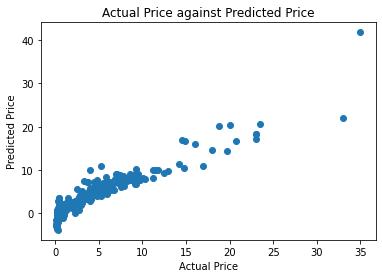

In [54]:
plt.scatter(y_train,prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price against Predicted Price')
plt.show()

In [55]:
test_prediction = linear_regression.predict(X_test)

In [56]:
errorscore1 = metrics.r2_score(y_test, test_prediction)
print('R-sqaured value is :',errorscore1)

R-sqaured value is : 0.8365766715027051


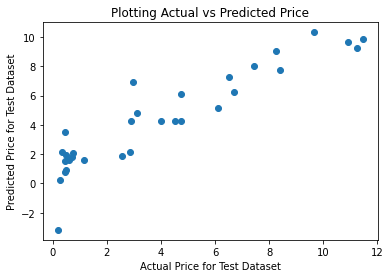

In [57]:
plt.scatter(y_test,test_prediction)
plt.xlabel('Actual Price for Test Dataset')
plt.ylabel('Predicted Price for Test Dataset')
plt.title('Plotting Actual vs Predicted Price')
plt.show()